In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Reading The Data

In [3]:
data = pd.read_csv('Iris.csv')
data = data.drop(columns=['Id'])
data = data.rename(columns={'SepalLengthCm':'sepallength','SepalWidthCm':'sepalwidth','PetalLengthCm':'petallength','PetalWidthCm':'petalwidth','Species':'species'})

### Understanding the Data

In [5]:
data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### Training the Model using Decision Tree Classifier

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

### Calculating the Predictions

In [10]:
predictions = dt.predict(xtest)

In [11]:
ans = pd.DataFrame(columns=['Actual','Predictions'])
ans.Actual = ytest
ans.Predictions = predictions
ans.head()

,Actual,Predictions
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa


### Calculating the Accuracy of the Model

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,predictions)
accuracy

1.0

### Visualizing the Tree 

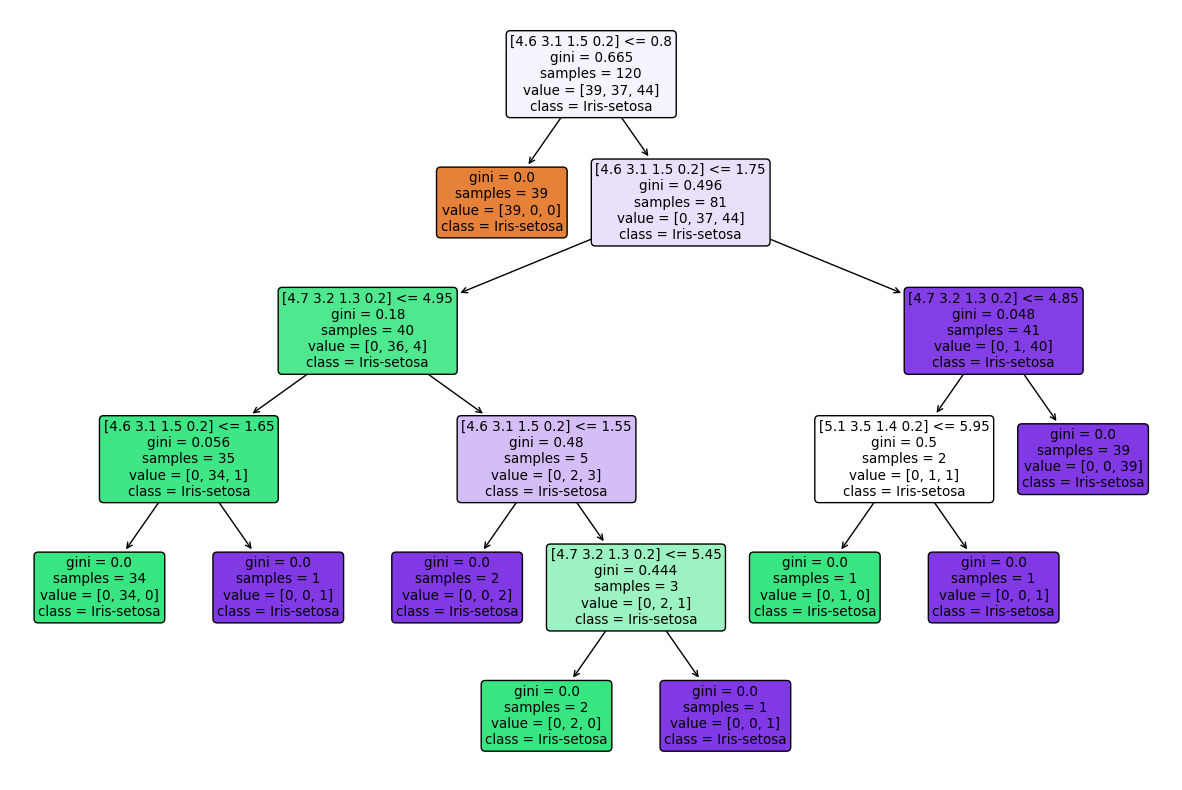

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt,filled=True, feature_names=x, class_names=y, rounded=True)
plt.show()